In [1]:
import pandas as pd

def select_state_data(csv_file, state_name):
    """
    Reads a CSV file, filters rows for Massachusetts, 
    and returns a DataFrame containing only Massachusetts data.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)

        # Filter rows based on the "state" column
        state_df = df[df["state"] == state_name]
        
        return state_df

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None  # Return None in case of an error
    except KeyError:
        print(f"Error: Column 'state' not found in '{csv_file}'.")
        return None

# Usage:
csv_file_path_2020 = "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/Power_Outages/eaglei_outages_2020_raw.csv"  # Replace with your CSV file path
massachusetts_df_2020 = select_state_data(csv_file_path_2020, "Massachusetts")

csv_file_path_2021 = "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/Power_Outages/eaglei_outages_2021_raw.csv"  # Replace with your CSV file path
massachusetts_df_2021 = select_state_data(csv_file_path_2021, "Massachusetts")

csv_file_path_2022 = "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/Power_Outages/eaglei_outages_2022_raw.csv"  # Replace with your CSV file path
massachusetts_df_2022 = select_state_data(csv_file_path_2022, "Massachusetts")

csv_file_path_2023 = "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/Power_Outages/eaglei_outages_2023_raw.csv"  # Replace with your CSV file path
massachusetts_df_2023 = select_state_data(csv_file_path_2023, "Massachusetts")




dfs = [massachusetts_df_2020, massachusetts_df_2021, massachusetts_df_2022, massachusetts_df_2023]
years = [2020, 2021, 2022, 2023]

for df, year in zip(dfs, years):
    if df is not None:  # Check if filtering was successful
        unique_counties = df["county"].unique()
        num_unique_counties = len(unique_counties)

        print(f"Unique Counties in Massachusetts for {year}: {num_unique_counties}")
    else:
        print(f"No data available for Massachusetts in {year}")

Unique Counties in Massachusetts for 2020: 14
Unique Counties in Massachusetts for 2021: 14
Unique Counties in Massachusetts for 2022: 14
Unique Counties in Massachusetts for 2023: 14


In [2]:
massachusetts_df_2023.rename(columns={'sum': 'customers_out'}, inplace=True)

In [8]:
county_names = ["Suffolk", "Franklin", "Middlesex"] 

# Loop through each county name and create DataFrames for each year
for county_name in county_names:
  # Filter for the current county
  county_df_2020 = massachusetts_df_2020[massachusetts_df_2020["county"] == county_name]
  county_df_2021 = massachusetts_df_2021[massachusetts_df_2021["county"] == county_name]
  county_df_2022 = massachusetts_df_2022[massachusetts_df_2022["county"] == county_name]
  county_df_2023 = massachusetts_df_2023[massachusetts_df_2023["county"] == county_name]

  # Dynamically create DataFrame names and assign the filtered DataFrames
  globals()[f"{county_name}_df_2020"] = county_df_2020
  globals()[f"{county_name}_df_2021"] = county_df_2021
  globals()[f"{county_name}_df_2022"] = county_df_2022
  globals()[f"{county_name}_df_2023"] = county_df_2023

    # List of DataFrames to concatenate for the current county
  dataframes_to_concat = [
      globals()[f"{county_name}_df_2020"],
      globals()[f"{county_name}_df_2021"],
      globals()[f"{county_name}_df_2022"],
      globals()[f"{county_name}_df_2023"]
  ]

  # Concatenate the DataFrames for the current county
  globals()[f"{county_name}_df"] = pd.concat(dataframes_to_concat, ignore_index=True)


Suffolk_df


,fips_code,county,state,customers_out,run_start_time
0,25025,Suffolk,Massachusetts,31.0,2020-01-01 00:00:00
1,25025,Suffolk,Massachusetts,32.0,2020-01-01 00:15:00
2,25025,Suffolk,Massachusetts,32.0,2020-01-01 00:30:00
3,25025,Suffolk,Massachusetts,32.0,2020-01-01 00:45:00
4,25025,Suffolk,Massachusetts,31.0,2020-01-01 01:00:00
...,...,...,...,...,...
78238,25025,Suffolk,Massachusetts,1.0,2023-12-31 14:00:00
78239,25025,Suffolk,Massachusetts,1.0,2023-12-31 14:15:00
78240,25025,Suffolk,Massachusetts,1.0,2023-12-31 14:30:00
78241,25025,Suffolk,Massachusetts,1.0,2023-12-31 14:45:00


In [11]:
import pandas as pd

def get_season(date):
    month = date.month
    day = date.day

    if (month == 3 and day >= 1) or (month >= 4 and month <= 5) or (month == 6 and day == 1):
        return 2  # Spring
    elif month >= 6 and month <= 8:
        return 1  # Summer
    elif month >= 9 and month <= 11:
        return 2  # Fall
    else:
        return 3  # Winter

# Loop through each county name to process the data
for county_name in county_names:
  # Get the concatenated DataFrame for the current county
  county_df = globals()[f"{county_name}_df"]

  # Enrich with information about weekend/weekday
  county_df['run_start_time'] = pd.to_datetime(county_df['run_start_time'])
  county_df = county_df.sort_values('run_start_time')
  county_df['Weekend'] = county_df['run_start_time'].dt.weekday.isin([5, 6]).astype(int)

  # Apply the get_season function to create the 'Season' column
  county_df['Season'] = county_df['run_start_time'].apply(get_season)

  # Update the concatenated DataFrame for the current county
  globals()[f"{county_name}_df"] = county_df




,fips_code,county,state,customers_out,run_start_time,Weekend,Season
0,25025,Suffolk,Massachusetts,31.0,2020-01-01 00:00:00,0,3
1,25025,Suffolk,Massachusetts,32.0,2020-01-01 00:15:00,0,3
2,25025,Suffolk,Massachusetts,32.0,2020-01-01 00:30:00,0,3
3,25025,Suffolk,Massachusetts,32.0,2020-01-01 00:45:00,0,3
4,25025,Suffolk,Massachusetts,31.0,2020-01-01 01:00:00,0,3


In [13]:
import pandas as pd

# ... (previous code to create county-specific DataFrames and add Weekend/Season columns) ...

# Loop through each county name to process the data
for county_name in county_names:
  # Get the concatenated DataFrame for the current county
  county_df = globals()[f"{county_name}_df"]

  # Sort by 'run_start_time' to ensure chronological order
  county_df = county_df.sort_values('run_start_time')

  # Calculate the time difference between consecutive rows in minutes
  county_df['time_diff'] = county_df['run_start_time'].diff().dt.total_seconds() / 60

  # Fill the first difference (which will be NaN) with 15 (assuming the first row is the start of an outage)
  county_df['time_diff'].fillna(15, inplace=True)

  # Create an 'outage_id' column to group consecutive 15-minute intervals into outages
  county_df['outage_id'] = (county_df['time_diff'] > 15).cumsum()

  # Create a boolean mask to identify the first row of each outage group
  is_start_of_outage = county_df['outage_id'] != county_df['outage_id'].shift(1)

  # Filter the DataFrame using the mask to get only the starting times
  globals()[f"{county_name}_starting_df"] = county_df[is_start_of_outage].copy()

  # Update the concatenated DataFrame for the current county
  globals()[f"{county_name}_df"] = county_df

# Get the concatenated DataFrame and the starting DataFrame for the current county
  county_df = globals()[f"{county_name}_df"]
  county_starting_df = globals()[f"{county_name}_starting_df"] 

  # Group by 'outage_id' and count the number of intervals to get the outage duration in intervals
  outage_durations_df = county_df.groupby('outage_id').size().reset_index(name='duration_intervals')

  # Convert duration from intervals to minutes
  outage_durations_df['duration_minutes'] = outage_durations_df['duration_intervals'] * 15

  # Merge the two DataFrames on 'outage_id'
  county_starting_df = pd.merge(county_starting_df, outage_durations_df, on='outage_id', how='left')
  county_starting_df.drop(columns=['time_diff'], inplace=True)

  # Update the starting DataFrame for the current county
  globals()[f"{county_name}_starting_df"] = county_starting_df

C:\Users\jonas\AppData\Local\Temp\ipykernel_14732\2439399215.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  county_df['time_diff'].fillna(15, inplace=True)
C:\Users\jonas\AppData\Local\Temp\ipykernel_14732\2439399215.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [18]:
# Just for control, and it works!

# Count outages longer than 480 minutes
longer_than_480 = Middlesex_starting_df[Middlesex_starting_df['duration_minutes'] >= 60].shape[0]

# Count outages shorter than or equal to 480 minutes
shorter_than_or_equal_to_480 = Middlesex_starting_df[Middlesex_starting_df['duration_minutes'] >= 480].shape[0]

print("Number of outages longer than 60 minutes:", longer_than_480)
print("Number of outages longer than 480 minutes:", shorter_than_or_equal_to_480)

Number of outages longer than 60 minutes: 3031
Number of outages longer than 480 minutes: 950


In [20]:
# Collect all the county-specific starting DataFrames
starting_dfs = [globals()[f"{county_name}_starting_df"] for county_name in county_names]

# Concatenate all the starting DataFrames into a single DataFrame
Massachusetts_starting_df = pd.concat(starting_dfs, ignore_index=True)
Massachusetts_starting_df.head()

,fips_code,county,state,customers_out,run_start_time,Weekend,Season,outage_id,duration_intervals,duration_minutes
0,25025,Suffolk,Massachusetts,31.0,2020-01-01 00:00:00,0,3,0,12,180
1,25025,Suffolk,Massachusetts,83.0,2020-01-01 13:00:00,0,3,1,12,180
2,25025,Suffolk,Massachusetts,1.0,2020-01-01 16:15:00,0,3,2,1,15
3,25025,Suffolk,Massachusetts,1.0,2020-01-01 18:30:00,0,3,3,14,210
4,25025,Suffolk,Massachusetts,1.0,2020-01-01 23:15:00,0,3,4,8,120


In [25]:
import pandas as pd

# Calculate the threshold for the 0.1% longest outages
threshold = int(0.001 * len(Massachusetts_starting_df))

# Sort by duration in descending order
df_sorted = Massachusetts_starting_df.sort_values(by='duration_minutes', ascending=False)

# Select and display the top rows (0.1% longest)
top_outages = df_sorted.head(threshold)

if top_outages.empty:
    print("No outages found within the top 0.1%.")
else:
    print("\nTop 0.1% Longest Outages in Massachusetts:\n")
    print(top_outages)


Top 0.1% Longest Outages in Massachusetts:

       fips_code     county          state  customers_out      run_start_time  \
8331       25017  Middlesex  Massachusetts           13.0 2020-09-30 07:15:00   
11048      25017  Middlesex  Massachusetts           13.0 2023-04-06 14:30:00   
11393      25017  Middlesex  Massachusetts          130.0 2023-09-07 00:30:00   
11045      25017  Middlesex  Massachusetts            1.0 2023-03-23 12:15:00   
10232      25017  Middlesex  Massachusetts           14.0 2022-05-26 11:30:00   
3796       25025    Suffolk  Massachusetts           66.0 2023-03-25 15:00:00   
3798       25025    Suffolk  Massachusetts            1.0 2023-04-04 12:30:00   
2052       25025    Suffolk  Massachusetts            NaN 2021-10-28 17:00:00   
11394      25017  Middlesex  Massachusetts            2.0 2023-09-17 20:15:00   
8194       25017  Middlesex  Massachusetts            1.0 2020-08-03 04:45:00   
862        25025    Suffolk  Massachusetts           68.0 2020-1

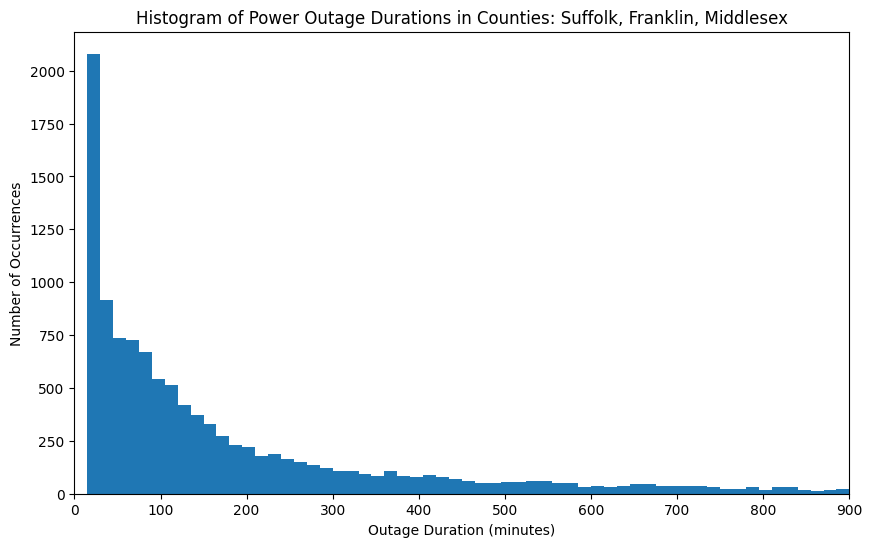

In [30]:
# Plot the histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
plt.xlim(0, 900)
plt.hist(Massachusetts_starting_df['duration_minutes'], bins = list(range(0, 15000, 15)))  # Adjust 'bins' as needed
plt.xlabel('Outage Duration (minutes)')
plt.ylabel('Number of Occurrences')
plt.title(f'Histogram of Power Outage Durations in Counties: {", ".join(county_names)}')
plt.show()

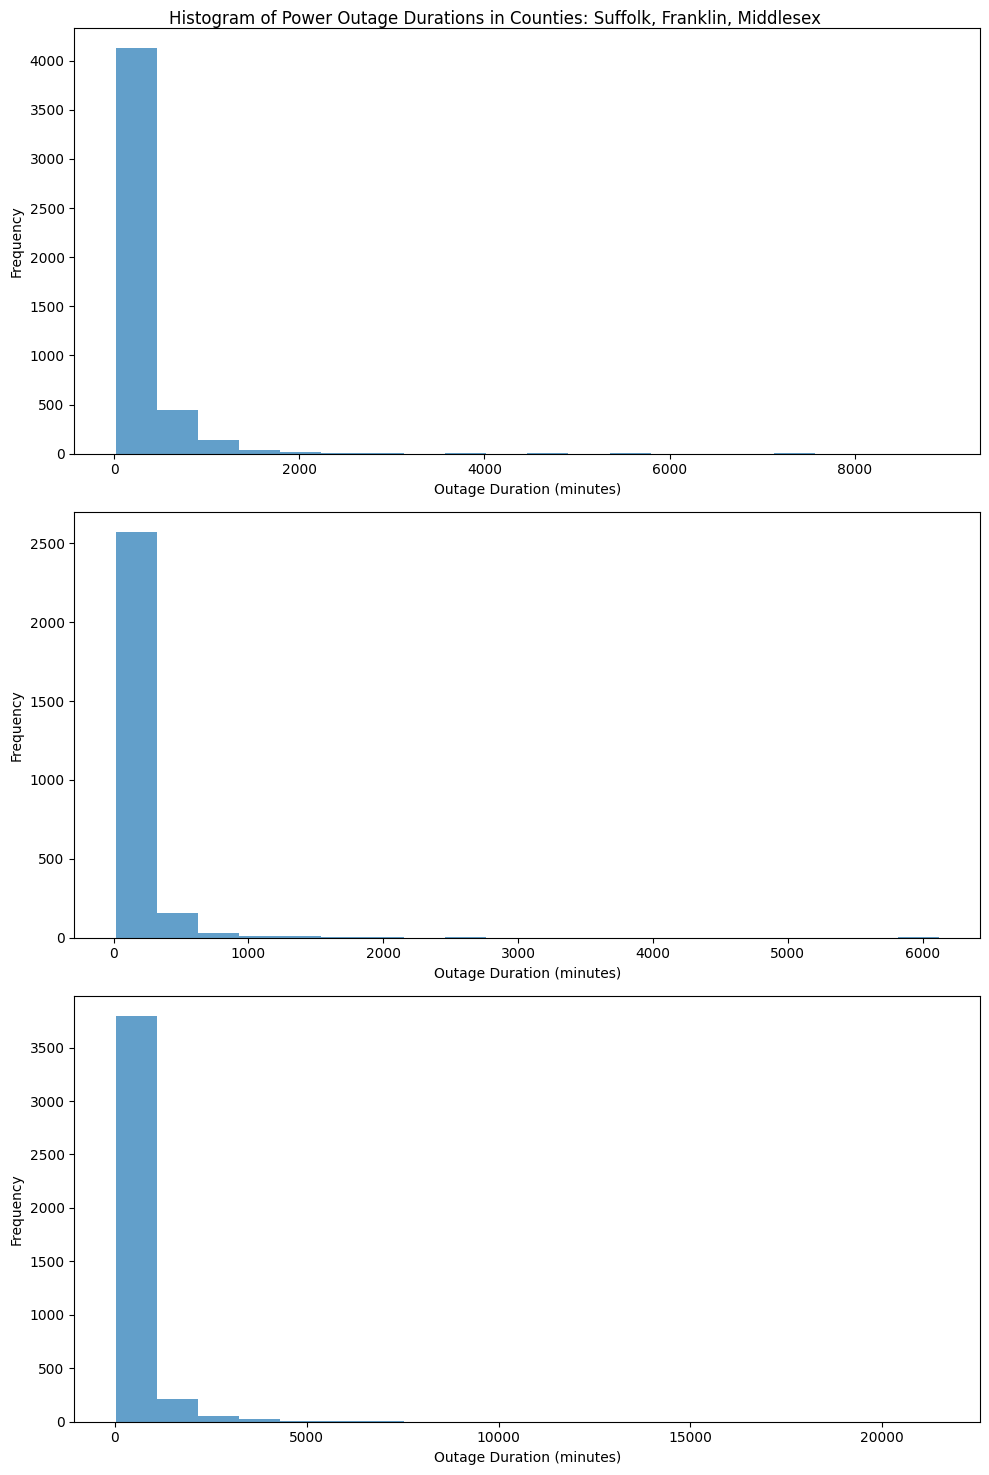

In [29]:
import matplotlib.pyplot as plt

# ... (your existing code for data processing) ...

# Create subplots for each county
fig, axes = plt.subplots(nrows=len(county_names), ncols=1, figsize=(10, 5 * len(county_names)))  # Adjust figsize as needed

# Iterate through county names and plot histograms
for i, county_name in enumerate(county_names):
    county_starting_df = globals()[f"{county_name}_starting_df"]

    # Plot histogram for the current county
    axes[i].hist(county_starting_df['duration_minutes'], bins=20, alpha=0.7)
    axes[i].set_xlabel('Outage Duration (minutes)')
    axes[i].set_ylabel('Frequency')

# Set the overall title with all county names
plt.suptitle(f'Histogram of Power Outage Durations in Counties: {", ".join(county_names)}')

# Adjust layout for better readability
plt.tight_layout()
plt.show()